In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a DataFrame
combined_season_data = pd.read_csv('combined_season_data.csv')

### 1. Standard Deviation

##### Calculating WPCT (Win percentage), Standard deviation σL(WinPct), σL(NAGR), σL(NAGCR)

In [3]:
# calculating Win Percentage
df = combined_season_data.copy()

# Calculate win percentage for each team for each game
df['HomeWin'] = (df['FTR'] == 'H').astype(int)
df['AwayWin'] = (df['FTR'] == 'A').astype(int)

# Calculating win percentages for home and away games separately
home_stats = df.groupby(['Season', 'HomeTeam']).agg(HomeGames=('HomeTeam', 'size'), HomeWins=('HomeWin', 'sum')).reset_index()
away_stats = df.groupby(['Season', 'AwayTeam']).agg(AwayGames=('AwayTeam', 'size'), AwayWins=('AwayWin', 'sum')).reset_index()

# Merging home and away statistics based on season and team
team_stats = pd.merge(home_stats, away_stats, left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'])

# Calculating total games played, total wins, and win percentage for each team for each season
team_stats['TotalGames'] = team_stats['HomeGames'] + team_stats['AwayGames']
team_stats['TotalWins'] = team_stats['HomeWins'] + team_stats['AwayWins']
team_stats['WPCT'] = team_stats['TotalWins'] / team_stats['TotalGames']

# Combine NAGR and NAGCR columns from the original dataframe
team_stats = pd.merge(team_stats, df[['Season', 'HomeTeam', 'NAGR', 'NAGCR']].drop_duplicates(), on=['Season', 'HomeTeam'])

# Calculate σL for all seasons
σL_WinPct = team_stats.groupby('Season')['WPCT'].std().reset_index().rename(columns={'WPCT': 'σL(WinPct)'})
σL_NAGR = team_stats.groupby('Season')['NAGR'].std().reset_index().rename(columns={'NAGR': 'σL(NAGR)'})
σL_NAGCR = team_stats.groupby('Season')['NAGCR'].std().reset_index().rename(columns={'NAGCR': 'σL(NAGCR)'})

# Merging the σL values for all metrics into one dataframe
sd_table = pd.merge(σL_WinPct, σL_NAGR, on='Season')
sd_table = pd.merge(sd_table, σL_NAGCR, on='Season')

sd_table


,Season,σL(WinPct),σL(NAGR),σL(NAGCR)
0,2002-2003,0.132410,0.164644,0.125930
1,2003-2004,0.137528,0.163753,0.121486
2,2004-2005,0.160175,0.170620,0.123074
3,2005-2006,0.164194,0.169418,0.115448
4,2006-2007,0.143822,0.174436,0.120851
5,2007-2008,0.168313,0.189433,0.167447
6,2008-2009,0.159910,0.173425,0.121550
7,2009-2010,0.165316,0.177736,0.121750
8,2010-2011,0.116502,0.168953,0.145590
9,2011-2012,0.161422,0.176329,0.136718


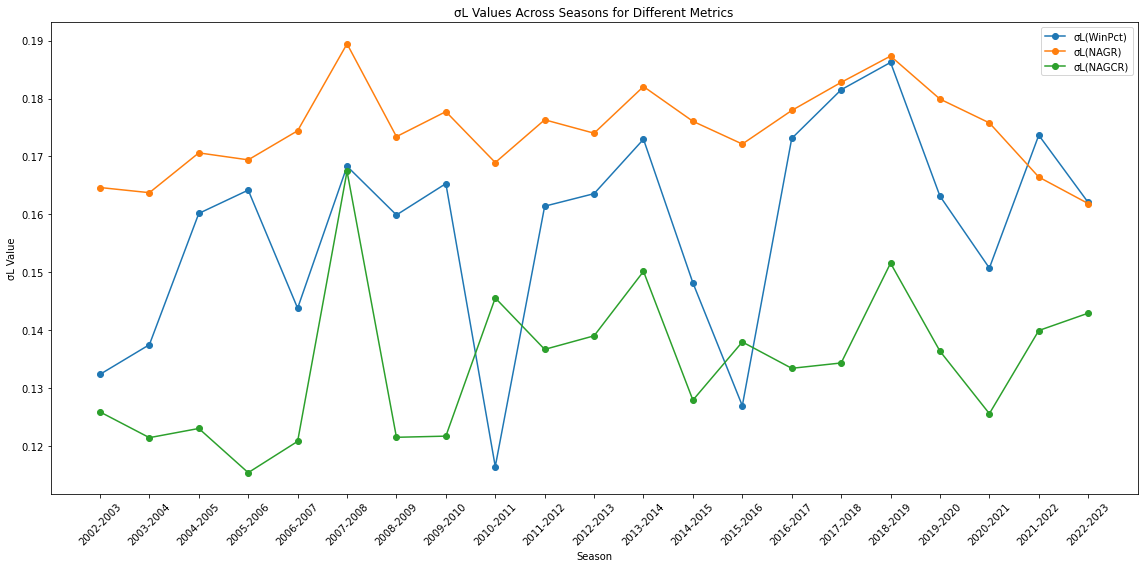

In [4]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(sd_table['Season'], sd_table['σL(WinPct)'], label='σL(WinPct)', marker='o')
plt.plot(sd_table['Season'], sd_table['σL(NAGR)'], label='σL(NAGR)', marker='o')
plt.plot(sd_table['Season'], sd_table['σL(NAGCR)'], label='σL(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('σL Value')
plt.title('σL Values Across Seasons for Different Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### Calculating Normalised Standard deviation σL*(WinPct), σL*(NAGR),  σL* (NAGCR)

In [5]:
# Calculating the upper bound for the actual observed standard deviation (ASD_ub) for each metric
# Using the maximum number of teams in the dataset as N for all calculations
N = max(team_stats.groupby('Season')['HomeTeam'].nunique())

ASD_ub = np.sqrt((N + 1) / (12 * (N - 1)))

# Calculating ASD* for each metric
ASD_star_WinPct = sd_table['σL(WinPct)'] / ASD_ub
ASD_star_NAGR = sd_table['σL(NAGR)'] / ASD_ub
ASD_star_NAGCR = sd_table['σL(NAGCR)'] / ASD_ub

# Adding the calculated values to the dataframe
sd_table['σL*(WinPct)'] = ASD_star_WinPct
sd_table['σL*(NAGR)'] = ASD_star_NAGR
sd_table['σL*(NAGCR)'] = ASD_star_NAGCR

# Keeping only the relevant columns for clarity
sd_normalized_table = sd_table[['Season', 'σL*(WinPct)', 'σL*(NAGR)', 'σL*(NAGCR)']]

sd_normalized_table


,Season,σL*(WinPct),σL*(NAGR),σL*(NAGCR)
0,2002-2003,0.436292,0.542504,0.414942
1,2003-2004,0.453158,0.539570,0.400300
2,2004-2005,0.527781,0.562196,0.405531
3,2005-2006,0.541023,0.558235,0.380404
4,2006-2007,0.473894,0.574770,0.398208
5,2007-2008,0.554596,0.624184,0.551739
6,2008-2009,0.526905,0.571439,0.400509
7,2009-2010,0.544721,0.585642,0.401170
8,2010-2011,0.383877,0.556704,0.479722
9,2011-2012,0.531889,0.581008,0.450488


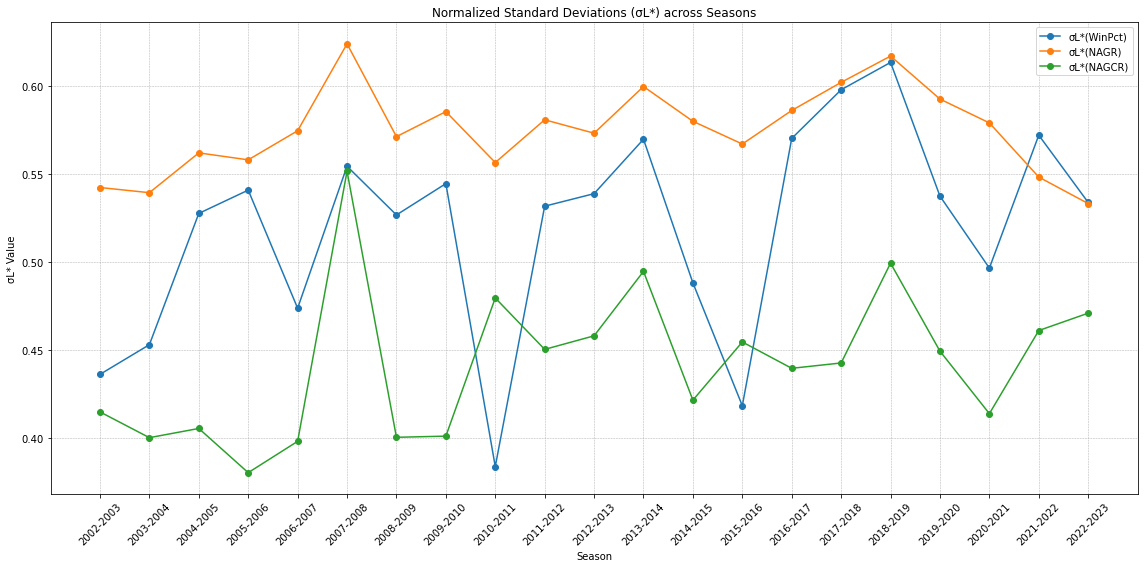

In [6]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(WinPct)'], label='σL*(WinPct)', marker='o')
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(NAGR)'], label='σL*(NAGR)', marker='o')
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(NAGCR)'], label='σL*(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('σL* Value')
plt.title('Normalized Standard Deviations (σL*) across Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


### 2. CBR (Competitive Balance Ratio)

In [7]:
# Calculate within-season-standard deviation for each metric for each season
SDws_WinPct = team_stats.groupby('Season')['WPCT'].std()
SDws_NAGR = team_stats.groupby('Season')['NAGR'].std()
SDws_NAGCR = team_stats.groupby('Season')['NAGCR'].std()

# Calculate average win percentage for each team across all seasons
team_avg_WinPct = team_stats.groupby('HomeTeam')['WPCT'].mean()

# Calculate within-team-standard deviation for Win Percentage for each team
SDwt_WinPct = team_stats.groupby('HomeTeam')['WPCT'].apply(lambda x: ((x - team_avg_WinPct[x.name]) ** 2).sum() / len(x))

# Calculate average NAGR for each team across all seasons
team_avg_NAGR = team_stats.groupby('HomeTeam')['NAGR'].mean()

# Calculate within-team-standard deviation for NAGR for each team
SDwt_NAGR = team_stats.groupby('HomeTeam')['NAGR'].apply(lambda x: ((x - team_avg_NAGR[x.name]) ** 2).sum() / len(x))

# Calculate average NAGCR for each team across all seasons
team_avg_NAGCR = team_stats.groupby('HomeTeam')['NAGCR'].mean()

# Calculate within-team-standard deviation for NAGCR for each team
SDwt_NAGCR = team_stats.groupby('HomeTeam')['NAGCR'].apply(lambda x: ((x - team_avg_NAGCR[x.name]) ** 2).sum() / len(x))

# Calculate CBR for each season for each metric
CBR_WinPct = SDwt_WinPct.mean() / SDws_WinPct
CBR_NAGR = SDwt_NAGR.mean() / SDws_NAGR
CBR_NAGCR = SDwt_NAGCR.mean() / SDws_NAGCR

# Create a dataframe to store the results
cbr_per_season = pd.DataFrame({
    'Season': SDws_WinPct.index,
    'CBR(WinPct)': CBR_WinPct.values,
    'CBR(NAGR)': CBR_NAGR.values,
    'CBR(NAGCR)': CBR_NAGCR.values
})

cbr_per_season


,Season,CBR(WinPct),CBR(NAGR),CBR(NAGCR)
0,2002-2003,0.051596,0.102359,0.061124
1,2003-2004,0.049676,0.102915,0.063360
2,2004-2005,0.042652,0.098773,0.062543
3,2005-2006,0.041608,0.099474,0.066674
4,2006-2007,0.047502,0.096612,0.063693
5,2007-2008,0.040590,0.088964,0.045969
6,2008-2009,0.042723,0.097176,0.063327
7,2009-2010,0.041326,0.094819,0.063223
8,2010-2011,0.058641,0.099748,0.052870
9,2011-2012,0.042323,0.095575,0.056301


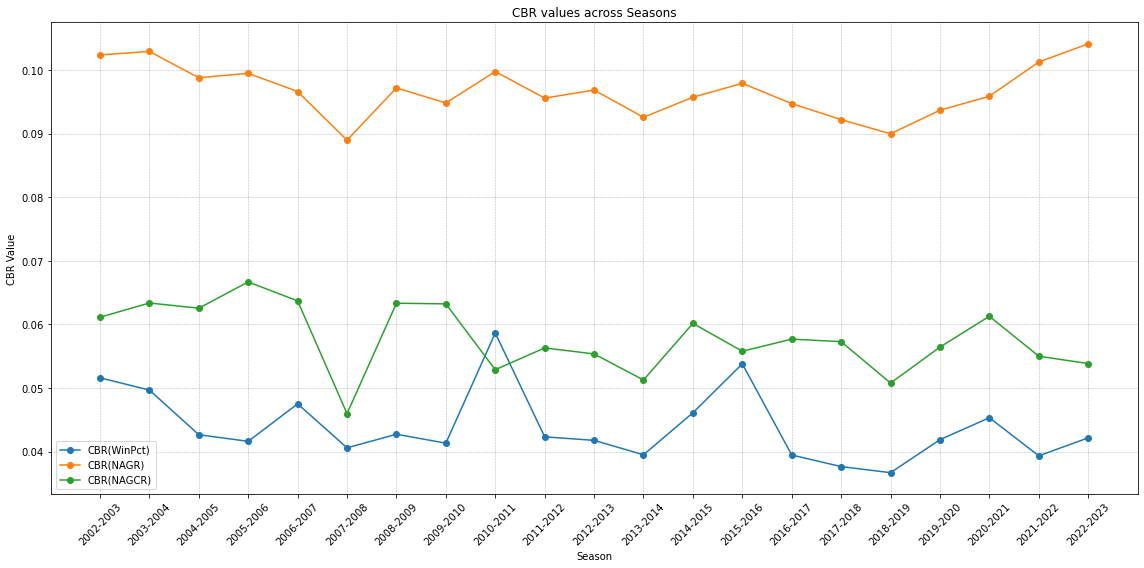

In [8]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(WinPct)'], label='CBR(WinPct)', marker='o')
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(NAGR)'], label='CBR(NAGR)', marker='o')
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(NAGCR)'], label='CBR(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('CBR Value')
plt.title('CBR values across Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


### 3. HHI* and HICB

In [9]:
data = combined_season_data.copy()

In [10]:
# Creating a function to determine points for a match
def determine_points(result):
    if result == 'H':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

# Calculating points for home and away teams
data['HomePoints'] = data['FTR'].apply(lambda x: determine_points(x))
data['AwayPoints'] = data['FTR'].apply(lambda x: determine_points('A' if x == 'H' else ('H' if x == 'A' else 'D')))

# Grouping by season and team to get the total points for each team in each season
home_points = data.groupby(['Season', 'HomeTeam'])['HomePoints', 'HAGR', 'HAGCR'].sum().reset_index()
away_points = data.groupby(['Season', 'AwayTeam'])['AwayPoints', 'AAGR', 'AAGCR'].sum().reset_index()

# Renaming columns for merging
home_points.rename(columns={'HomeTeam': 'Team', 'HomePoints': 'Points', 'HAGR': 'NAGR', 'HAGCR': 'NAGCR'}, inplace=True)
away_points.rename(columns={'AwayTeam': 'Team', 'AwayPoints': 'Points', 'AAGR': 'NAGR', 'AAGCR': 'NAGCR'}, inplace=True)

# Merging home and away data
total_points = pd.concat([home_points, away_points]).groupby(['Season', 'Team']).sum().reset_index()

total_points.head()


,Season,Team,Points,NAGR,NAGCR
0,2002-2003,Arsenal,78,53.316413,29.798896
1,2002-2003,Aston Villa,45,34.378770,39.778947
2,2002-2003,Birmingham,48,28.783529,37.770009
3,2002-2003,Blackburn,60,34.554786,39.908135
4,2002-2003,Bolton,44,33.482525,40.767586


In [11]:

# Defining the function to calculate HHI, HHI*, and HICB
def calculate_hhi_values(season_data, column):
    N = len(season_data)
    total = season_data[column].sum()
    
    # Calculate the squared market shares for each team
    season_data['Squared_Share'] = (season_data[column] / total) ** 2
    
    # HHI calculation
    hhi = season_data['Squared_Share'].sum()
    
    # HHI* calculation
    hhi_star = (hhi - (1 / N)) / (1 - (1 / N))
    
    # HICB calculation
    hicb = (hhi / (1 / N)) * 100
    
    return hhi, hhi_star, hicb

# Lists to store the results
seasons = []
hhi_points, hhi_nagr, hhi_nagcr = [], [], []
hhi_star_points, hhi_star_nagr, hhi_star_nagcr = [], [], []
hicb_points, hicb_nagr, hicb_nagcr = [], [], []

for season, season_data in total_points.groupby('Season'):
    seasons.append(season)
    
    hhi_p, hhi_star_p, hicb_p = calculate_hhi_values(season_data, 'Points')
    hhi_n, hhi_star_n, hicb_n = calculate_hhi_values(season_data, 'NAGR')
    hhi_c, hhi_star_c, hicb_c = calculate_hhi_values(season_data, 'NAGCR')
    
    hhi_points.append(hhi_p)
    hhi_star_points.append(hhi_star_p)
    hicb_points.append(hicb_p)
    
    hhi_nagr.append(hhi_n)
    hhi_star_nagr.append(hhi_star_n)
    hicb_nagr.append(hicb_n)
    
    hhi_nagcr.append(hhi_c)
    hhi_star_nagcr.append(hhi_star_c)
    hicb_nagcr.append(hicb_c)

# Combining results into a DataFrame
results_df = pd.DataFrame({
    'Season': seasons,
    'HHI_Points': hhi_points,
    'HHI_NAGR': hhi_nagr,
    'HHI_NAGCR': hhi_nagcr,
    'HHI*_Points': hhi_star_points,
    'HHI*_NAGR': hhi_star_nagr,
    'HHI*_NAGCR': hhi_star_nagcr,
    'HICB_Points': hicb_points,
    'HICB_NAGR': hicb_nagr,
    'HICB_NAGCR': hicb_nagcr
})

results_df


,Season,HHI_Points,HHI_NAGR,HHI_NAGCR,HHI*_Points,HHI*_NAGR,HHI*_NAGCR,HICB_Points,HICB_NAGR,HICB_NAGCR
0,2002-2003,0.054046,0.052659,0.051607,0.004259,0.002799,0.001692,108.092517,105.317303,103.214390
1,2003-2004,0.054110,0.052484,0.051530,0.004326,0.002615,0.001610,108.219158,104.968100,103.059112
2,2004-2005,0.055227,0.052949,0.051562,0.005502,0.003105,0.001644,110.453389,105.898646,103.123133
3,2005-2006,0.055824,0.052950,0.051361,0.006130,0.003105,0.001432,111.647311,105.899729,102.721307
4,2006-2007,0.054397,0.053088,0.051487,0.004628,0.003250,0.001565,108.793439,106.175636,102.973170
5,2007-2008,0.056842,0.053807,0.052717,0.007202,0.004007,0.002860,113.683432,107.613623,105.433758
6,2008-2009,0.055808,0.053119,0.051510,0.006114,0.003283,0.001590,111.616594,106.237301,103.020591
7,2009-2010,0.055739,0.053360,0.051506,0.006041,0.003537,0.001585,111.478105,106.720148,103.011777
8,2010-2011,0.052931,0.052898,0.052057,0.003085,0.003051,0.002166,105.861031,105.796768,104.114646
9,2011-2012,0.055271,0.053295,0.051822,0.005549,0.003469,0.001918,110.542789,106.590269,103.644933


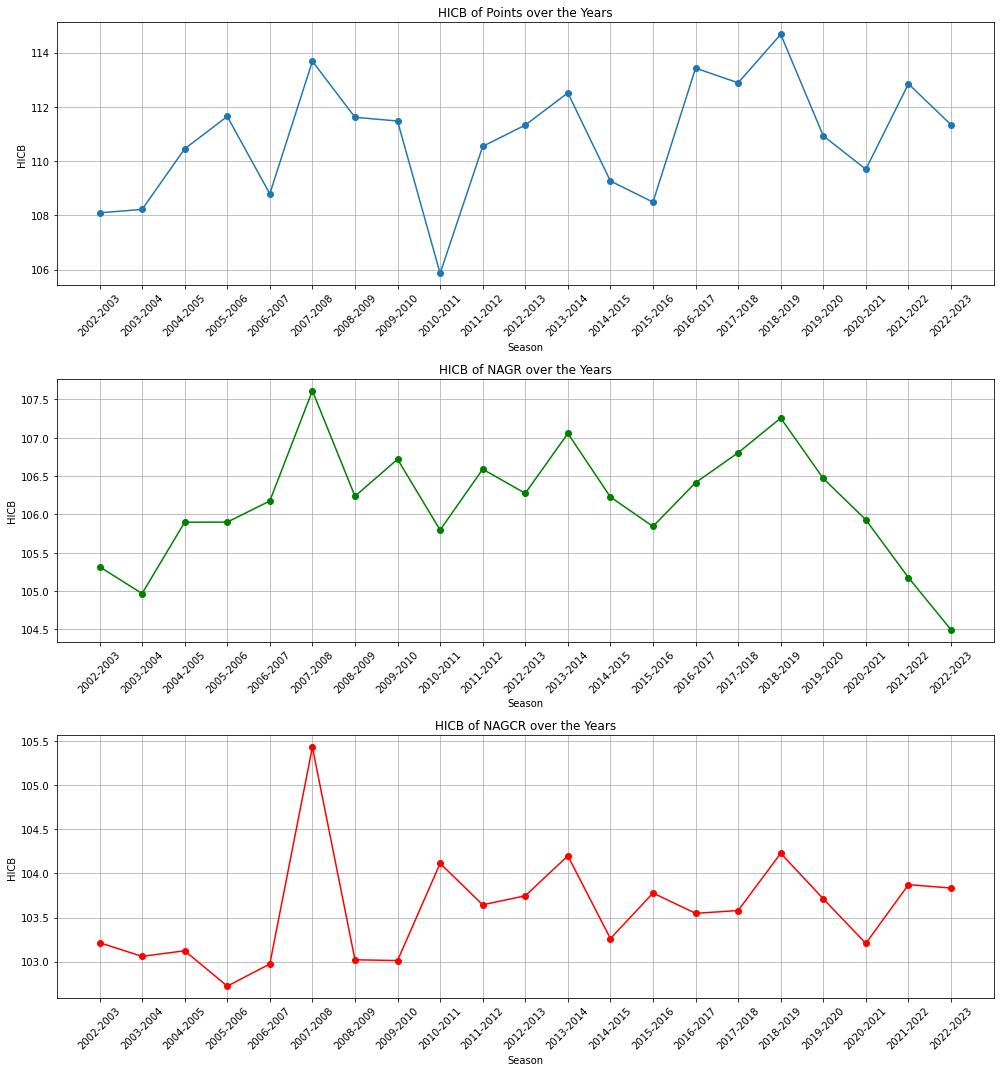

In [12]:
import matplotlib.pyplot as plt

# Setting up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

# Plotting HICB of Points, NAGR, and NAGCR over the years
ax[0].plot(results_df['Season'], results_df['HICB_Points'], marker='o', linestyle='-')
ax[0].set_title('HICB of Points over the Years')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('HICB')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

ax[1].plot(results_df['Season'], results_df['HICB_NAGR'], marker='o', linestyle='-', color='g')
ax[1].set_title('HICB of NAGR over the Years')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('HICB')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

ax[2].plot(results_df['Season'], results_df['HICB_NAGCR'], marker='o', linestyle='-', color='r')
ax[2].set_title('HICB of NAGCR over the Years')
ax[2].set_xlabel('Season')
ax[2].set_ylabel('HICB')
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(True)

# Adjusting layout
plt.tight_layout()
plt.show()


### 4. C5 and C5ICB

In [13]:
df = combined_season_data.copy()
# Calculating points for home and away teams in each match
df['HomePoints'] = df.apply(lambda row: 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0, axis=1)
df['AwayPoints'] = df.apply(lambda row: 3 if row['FTR'] == 'A' else 1 if row['FTR'] == 'D' else 0, axis=1)

# Creating a dataframe for home teams
home_df = df[['Season', 'HomeTeam', 'HomePoints']]
home_df.columns = ['Season', 'Team', 'Points']

# Creating a dataframe for away teams
away_df = df[['Season', 'AwayTeam', 'AwayPoints']]
away_df.columns = ['Season', 'Team', 'Points']

# Combining home and away dataframes
combined_df = pd.concat([home_df, away_df])

# Grouping by season and team to get the sum of points for each team in each season
season_team_points = combined_df.groupby(['Season', 'Team'])['Points'].sum().reset_index()

# Sorting values by season and points to get top teams
season_team_points_sorted = season_team_points.sort_values(by=['Season', 'Points'], ascending=[True, False])

# Getting the top 5 teams for each season
top_5_teams_each_season = season_team_points_sorted.groupby('Season').head(5)

# Calculating total points by top 5 teams each season
top_5_points = top_5_teams_each_season.groupby('Season')['Points'].sum()

# Calculating total points by all teams each season
total_points = season_team_points.groupby('Season')['Points'].sum()

# Calculating C5 Ratio
c5_ratio = top_5_points / total_points

# Calculating C5ICB
N = season_team_points['Team'].nunique()
c5_icb = (c5_ratio / (5/N)) * 100

# Combining the results
c5_results = pd.concat([c5_ratio, c5_icb], axis=1)
c5_results.columns = ['C5 Ratio', 'C5ICB']
c5_results.reset_index(inplace=True)
c5_results



,Season,C5 Ratio,C5ICB
0,2002-2003,0.343810,288.800000
1,2003-2004,0.348837,293.023256
2,2004-2005,0.363107,305.009709
3,2005-2006,0.365005,306.603951
4,2006-2007,0.353167,296.660269
5,2007-2008,0.380769,319.846154
6,2008-2009,0.377756,317.315436
7,2009-2010,0.366858,308.160920
8,2010-2011,0.342080,287.346939
9,2011-2012,0.364852,306.475645


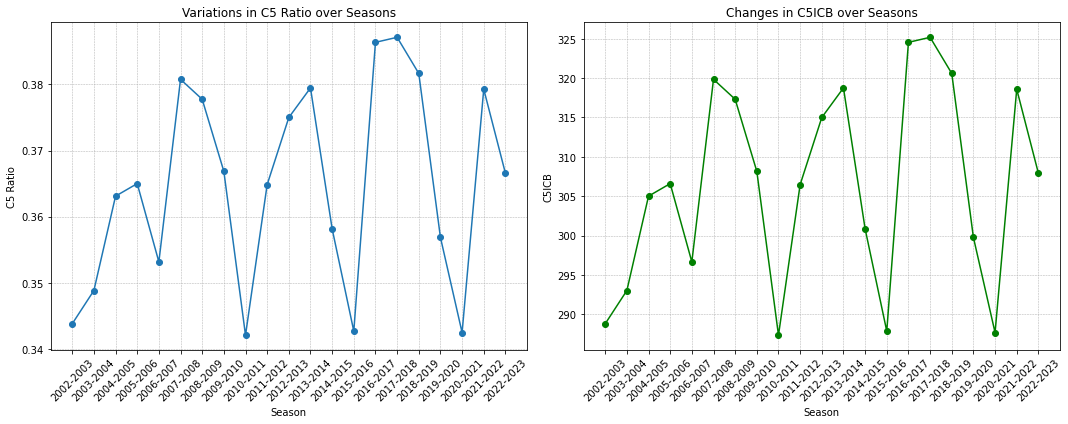

In [14]:
import matplotlib.pyplot as plt

# Plotting the variations in C5 Ratio and C5ICB over the seasons

plt.figure(figsize=(15,6))

# Plotting C5 Ratio
plt.subplot(1, 2, 1)
plt.plot(c5_results['Season'], c5_results['C5 Ratio'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Variations in C5 Ratio over Seasons')
plt.ylabel('C5 Ratio')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Plotting C5ICB
plt.subplot(1, 2, 2)
plt.plot(c5_results['Season'], c5_results['C5ICB'], marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.title('Changes in C5ICB over Seasons')
plt.ylabel('C5ICB')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Adjust layout
plt.tight_layout()
plt.show()


### Gini and Lorenz

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data again
df = combined_season_data.copy()

# Calculate points for each match
df['HomePts'] = df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
df['AwayPts'] = df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))

# Aggregate points for each team per season
home_pts = df.groupby(['Season', 'HomeTeam']).agg({'HomePts': 'sum'}).reset_index()
away_pts = df.groupby(['Season', 'AwayTeam']).agg({'AwayPts': 'sum'}).reset_index()
team_pts = pd.merge(home_pts, away_pts, left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'])
team_pts['TotalPts'] = team_pts['HomePts'] + team_pts['AwayPts']
team_pts = team_pts[['Season', 'HomeTeam', 'TotalPts']]

# Function to calculate Gini coefficient
def gini_coefficient(x):
    n = len(x)
    s = 0
    for i in range(n):
        s += (i+1) * x[i]
    return 1 - 2 * (s / sum(x) - (n + 1) / 2) / n

# Calculate Lorenz curve and Gini coefficient for each season
gini_values = []

for season in team_pts['Season'].unique():
    season_data = team_pts[team_pts['Season'] == season].sort_values(by='TotalPts')
    season_data['CumulativePts'] = season_data['TotalPts'].cumsum()
    season_data['CumulativePct'] = season_data['CumulativePts'] / season_data['TotalPts'].sum()
    season_data['TeamPct'] = (season_data.index + 1) / len(season_data)
    
    # Compute Gini coefficient
    gini = gini_coefficient(season_data['CumulativePct'].values)
    gini_values.append((season, gini))

gini_df = pd.DataFrame(gini_values, columns=['Season', 'GiniCoefficient'])

gini_df


,Season,GiniCoefficient
0,2002-2003,0.622385
1,2003-2004,0.632525
2,2004-2005,0.626881
3,2005-2006,0.607365
4,2006-2007,0.625998
5,2007-2008,0.603196
6,2008-2009,0.621094
7,2009-2010,0.609931
8,2010-2011,0.640887
9,2011-2012,0.618892


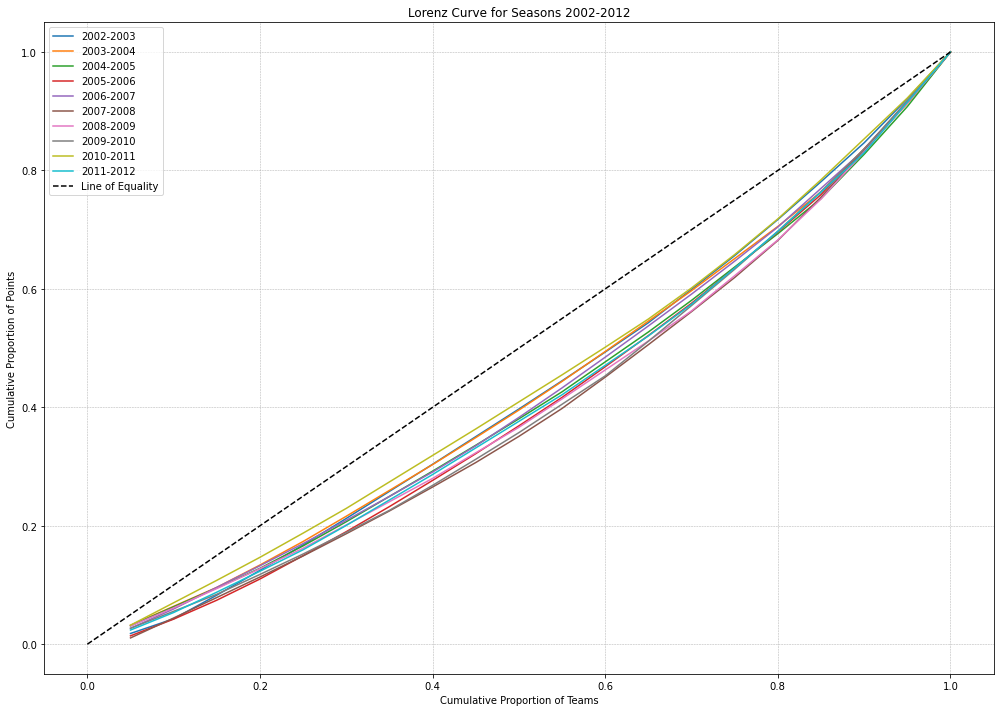

In [16]:
# Filter the data for the seasons 2002-2012
filtered_seasons = ["2002-2003", "2003-2004", "2004-2005", "2005-2006", "2006-2007", "2007-2008", 
                    "2008-2009", "2009-2010", "2010-2011", "2011-2012"]

filtered_data = combined_season_data[combined_season_data['Season'].isin(filtered_seasons)]

# define the function to compute Lorenz curve
def compute_lorenz_curve(points):
    sorted_points = np.sort(points)
    total_points = sorted_points.sum()
    cumulative_points = np.cumsum(sorted_points) / total_points
    cumulative_teams = np.arange(1, len(sorted_points) + 1) / len(sorted_points)
    return cumulative_teams, cumulative_points

# Calculate the total points for each team per season
def calculate_team_points(df):
    # 3 points for a win, 1 point for a draw
    df['HomePts'] = np.where(df['FTR'] == 'H', 3, np.where(df['FTR'] == 'D', 1, 0))
    df['AwayPts'] = np.where(df['FTR'] == 'A', 3, np.where(df['FTR'] == 'D', 1, 0))
    
    # Aggregate points for each team
    home_points = df.groupby(['Season', 'HomeTeam'])['HomePts'].sum().reset_index()
    away_points = df.groupby(['Season', 'AwayTeam'])['AwayPts'].sum().reset_index()
    
    home_points.rename(columns={'HomeTeam': 'Team', 'HomePts': 'Points'}, inplace=True)
    away_points.rename(columns={'AwayTeam': 'Team', 'AwayPts': 'Points'}, inplace=True)
    
    total_points = pd.concat([home_points, away_points], axis=0)
    total_points = total_points.groupby(['Season', 'Team'])['Points'].sum().reset_index()
    
    return total_points

team_points = calculate_team_points(combined_season_data)

# Filter for seasons 2002-2012
team_points_filtered = team_points[team_points['Season'].isin(filtered_seasons)]

# Compute the Lorenz curve values for the filtered seasons using the points data
lorenz_curves = {}
for season in filtered_seasons:
    season_data = team_points_filtered[team_points_filtered['Season'] == season]
    lorenz_x, lorenz_y = compute_lorenz_curve(season_data['Points'])
    lorenz_curves[season] = (lorenz_x, lorenz_y)

# Plotting
plt.figure(figsize=(14, 10))
for season, (lx, ly) in lorenz_curves.items():
    plt.plot(lx, ly, label=season)

# Plotting the line of equality
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label="Line of Equality")

plt.title('Lorenz Curve for Seasons 2002-2012')
plt.xlabel('Cumulative Proportion of Teams')
plt.ylabel('Cumulative Proportion of Points')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


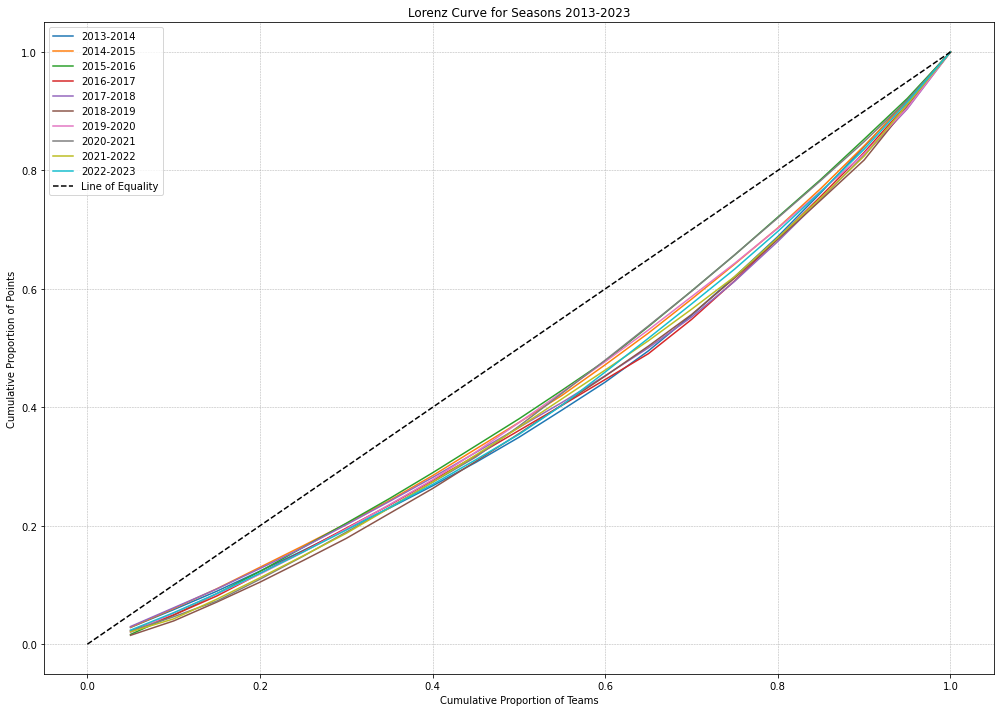

In [17]:
# Filter the data for the seasons 2002-2012
filtered_seasons = ['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']


filtered_data = combined_season_data[combined_season_data['Season'].isin(filtered_seasons)]

# define the function to compute Lorenz curve
def compute_lorenz_curve(points):
    sorted_points = np.sort(points)
    total_points = sorted_points.sum()
    cumulative_points = np.cumsum(sorted_points) / total_points
    cumulative_teams = np.arange(1, len(sorted_points) + 1) / len(sorted_points)
    return cumulative_teams, cumulative_points

# Calculate the total points for each team per season
def calculate_team_points(df):
    # 3 points for a win, 1 point for a draw
    df['HomePts'] = np.where(df['FTR'] == 'H', 3, np.where(df['FTR'] == 'D', 1, 0))
    df['AwayPts'] = np.where(df['FTR'] == 'A', 3, np.where(df['FTR'] == 'D', 1, 0))
    
    # Aggregate points for each team
    home_points = df.groupby(['Season', 'HomeTeam'])['HomePts'].sum().reset_index()
    away_points = df.groupby(['Season', 'AwayTeam'])['AwayPts'].sum().reset_index()
    
    home_points.rename(columns={'HomeTeam': 'Team', 'HomePts': 'Points'}, inplace=True)
    away_points.rename(columns={'AwayTeam': 'Team', 'AwayPts': 'Points'}, inplace=True)
    
    total_points = pd.concat([home_points, away_points], axis=0)
    total_points = total_points.groupby(['Season', 'Team'])['Points'].sum().reset_index()
    
    return total_points

team_points = calculate_team_points(combined_season_data)

# Filter for seasons 2002-2012
team_points_filtered = team_points[team_points['Season'].isin(filtered_seasons)]

# Compute the Lorenz curve values for the filtered seasons using the points data
lorenz_curves = {}
for season in filtered_seasons:
    season_data = team_points_filtered[team_points_filtered['Season'] == season]
    lorenz_x, lorenz_y = compute_lorenz_curve(season_data['Points'])
    lorenz_curves[season] = (lorenz_x, lorenz_y)

# Plotting
plt.figure(figsize=(14, 10))
for season, (lx, ly) in lorenz_curves.items():
    plt.plot(lx, ly, label=season)

# Plotting the line of equality
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label="Line of Equality")

plt.title('Lorenz Curve for Seasons 2013-2023')
plt.xlabel('Cumulative Proportion of Teams')
plt.ylabel('Cumulative Proportion of Points')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Relative Entropy

In [18]:
# Calculate win percentage for each team for each game
df['HomeWin'] = (df['FTR'] == 'H').astype(int)
df['AwayWin'] = (df['FTR'] == 'A').astype(int)

# Calculating win percentages for home and away games separately
home_stats = df.groupby(['Season', 'HomeTeam']).agg(HomeGames=('HomeTeam', 'size'), HomeWins=('HomeWin', 'sum')).reset_index()
away_stats = df.groupby(['Season', 'AwayTeam']).agg(AwayGames=('AwayTeam', 'size'), AwayWins=('AwayWin', 'sum')).reset_index()

# Merging home and away statistics based on season and team
team_stats = pd.merge(home_stats, away_stats, left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'])

# Calculating total games played, total wins, and win percentage for each team for each season
team_stats['TotalGames'] = team_stats['HomeGames'] + team_stats['AwayGames']
team_stats['TotalWins'] = team_stats['HomeWins'] + team_stats['AwayWins']
team_stats['WPCT'] = team_stats['TotalWins'] / team_stats['TotalGames']

# Combine NAGR and NAGCR columns from the original dataframe
team_stats = pd.merge(team_stats, df[['Season', 'HomeTeam', 'NAGR', 'NAGCR']].drop_duplicates(), on=['Season', 'HomeTeam'])


In [19]:
df = combined_season_data.copy()

# Calculating Relative Entropy for Win Percentage, NAGR, and NAGCR

def calculate_relative_entropy(df, column):
    """Calculate the relative entropy for a given column."""
    # Calculate pi (proportion of total wins or metric value in the league season for team i)
    df['pi'] = df[column] / df.groupby('Season')[column].transform('sum')
    
    # Calculate E (actual entropy)
    df['E'] = -df['pi'] * np.log2(df['pi'])
    E_values = df.groupby('Season')['E'].sum().reset_index()
    
    # Calculate Emax (maximum possible entropy)
    N = df.groupby('Season')['HomeTeam'].nunique().reset_index(name='N')
    Emax_values = -np.log2(1/N['N'])
    
    # Calculate Relative Entropy R
    R = E_values['E'] / Emax_values
    
    return R

# Calculate Relative Entropy for each metric
R_WinPct = calculate_relative_entropy(team_stats, 'WPCT')
R_NAGR = calculate_relative_entropy(team_stats, 'NAGR')
R_NAGCR = calculate_relative_entropy(team_stats, 'NAGCR')

# Combine the results into a DataFrame
relative_entropy_df = pd.DataFrame({
    'Season': team_stats['Season'].unique(),
    'RE(WinPct)': R_WinPct,
    'RE(NAGR)': R_NAGR,
    'RE(NAGCR)': R_NAGCR
})

relative_entropy_df


,Season,RE(WinPct),RE(NAGR),RE(NAGCR)
0,2002-2003,1.961558,1.978516,1.980143
1,2003-2004,1.959745,1.978666,1.980294
2,2004-2005,1.951234,1.978045,1.980236
3,2005-2006,1.953463,1.978120,1.980514
4,2006-2007,1.958698,1.977782,1.980334
5,2007-2008,1.945636,1.976585,1.978482
6,2008-2009,1.954054,1.977825,1.980313
7,2009-2010,1.951653,1.977462,1.980304
8,2010-2011,1.965678,1.978219,1.979401
9,2011-2012,1.953904,1.977573,1.979783


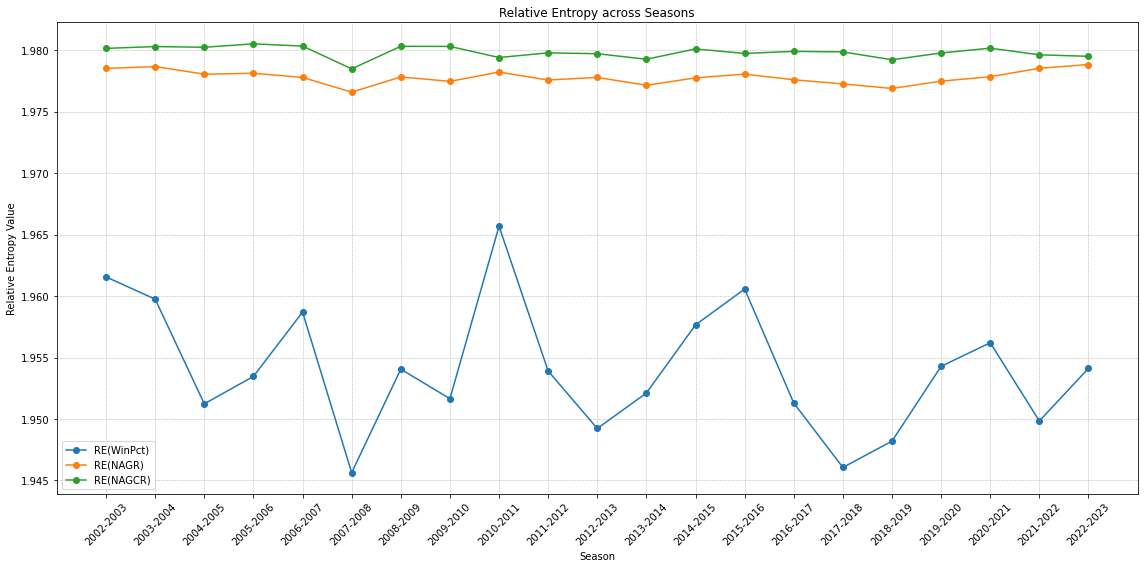

In [20]:
# Plotting Relative Entropy values for each metric across seasons
plt.figure(figsize=(16, 8))

plt.plot(relative_entropy_df['Season'], relative_entropy_df['RE(WinPct)'], label='RE(WinPct)', marker='o')
plt.plot(relative_entropy_df['Season'], relative_entropy_df['RE(NAGR)'], label='RE(NAGR)', marker='o')
plt.plot(relative_entropy_df['Season'], relative_entropy_df['RE(NAGCR)'], label='RE(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Relative Entropy Value')
plt.title('Relative Entropy across Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Comparisions

#### NSD and Contentration Ratio

In [25]:

# 1. Standard Deviation & Normalized Standard Deviation:
recent_sd_normalized = sd_normalized_table.tail(10)

# 2. Concentration Ratios:
recent_c5_results = c5_results.tail(10)

#3. HICB:
recent_hicb = results_df.tail(10)

# 4. League Table Analysis:
recent_seasons = combined_season_data['Season'].unique()[-10:]

# Calculate total points for each team in the recent seasons
recent_team_points = team_points[team_points['Season'].isin(recent_seasons)]

# Sort to get the top performing teams
recent_team_points_sorted = recent_team_points.sort_values(by=['Season', 'Points'], ascending=[True, False])

# Getting the top 5 teams for each recent season
top_5_teams_recent_seasons = recent_team_points_sorted.groupby('Season').head(5)


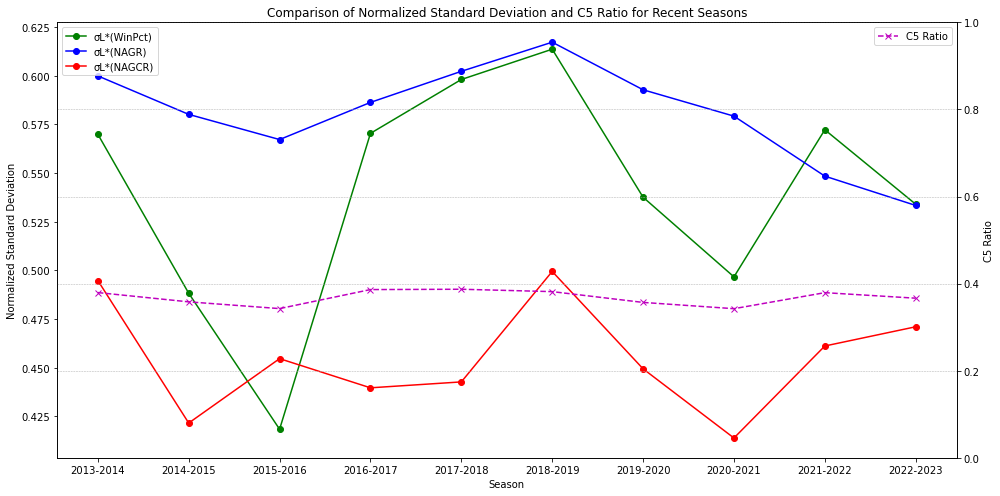

In [24]:
# Setting up the plots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plotting Normalized Standard Deviations on ax1
ax1.plot(recent_sd_normalized['Season'], recent_sd_normalized['σL*(WinPct)'], 'g-', marker='o', label='σL*(WinPct)')
ax1.plot(recent_sd_normalized['Season'], recent_sd_normalized['σL*(NAGR)'], 'b-', marker='o', label='σL*(NAGR)')
ax1.plot(recent_sd_normalized['Season'], recent_sd_normalized['σL*(NAGCR)'], 'r-', marker='o', label='σL*(NAGCR)')

# Plotting C5 Ratio on ax2
ax2.plot(recent_c5_results['Season'], recent_c5_results['C5 Ratio'], 'm--', marker='x', label='C5 Ratio')
ax2.set_ylim(0, 1)  # Setting the limit for C5 Ratio for clarity

# Setting labels and titles
ax1.set_xlabel('Season')
ax1.set_ylabel('Normalized Standard Deviation', color='black')
ax2.set_ylabel('C5 Ratio', color='black')
ax1.set_title('Comparison of Normalized Standard Deviation and C5 Ratio for Recent Seasons')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/NSD_C5.pdf"
plt.savefig(file_path)
plt.show()


##### NSD and HICB

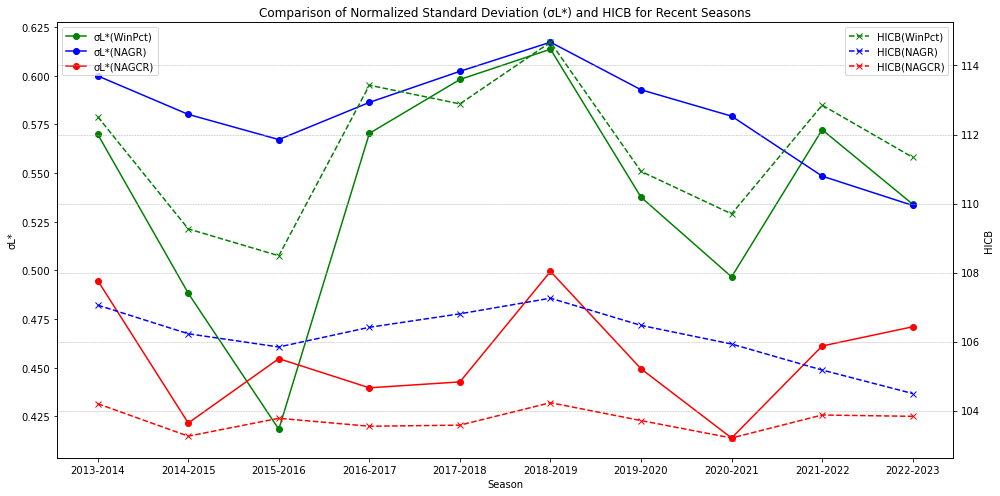

In [27]:
# Extracting the recent data for normalized standard deviation and HICB from the previously computed dataframes
recent_sd_normalized_subset = recent_sd_normalized[['Season', 'σL*(WinPct)', 'σL*(NAGR)', 'σL*(NAGCR)']]
recent_hicb_subset = recent_hicb[['Season', 'HICB_Points', 'HICB_NAGR', 'HICB_NAGCR']]

# Merging the datasets for comparison
sd_hicb_comparison = pd.merge(recent_sd_normalized_subset, recent_hicb_subset, on='Season')

# Setting up the plots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting normalized standard deviation values on ax1
ax1.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['σL*(WinPct)'], 'g-', marker='o', label='σL*(WinPct)')
ax1.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['σL*(NAGR)'], 'b-', marker='o', label='σL*(NAGR)')
ax1.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['σL*(NAGCR)'], 'r-', marker='o', label='σL*(NAGCR)')

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plotting HICB on ax2
ax2.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['HICB_Points'], 'g--', marker='x', label='HICB(WinPct)')
ax2.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['HICB_NAGR'], 'b--', marker='x', label='HICB(NAGR)')
ax2.plot(sd_hicb_comparison['Season'], sd_hicb_comparison['HICB_NAGCR'], 'r--', marker='x', label='HICB(NAGCR)')

# Setting labels and titles
ax1.set_xlabel('Season')
ax1.set_ylabel('σL*', color='black')
ax2.set_ylabel('HICB', color='black')
ax1.set_title('Comparison of Normalized Standard Deviation (σL*) and HICB for Recent Seasons')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/NSD_HICB.pdf"
plt.savefig(file_path)

plt.show()


##### HICB and C5ICB

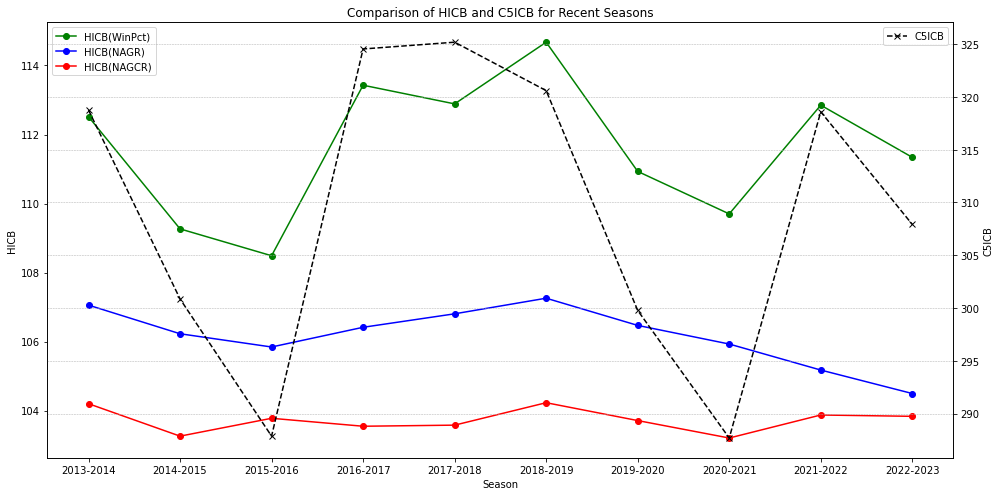

In [28]:
# Extracting the recent data for HICB and C5ICB from the previously computed dataframes
hicb_c5icb_comparison = pd.merge(recent_hicb, recent_c5_results, on='Season')

# Setting up the plots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting HICB values on ax1
ax1.plot(hicb_c5icb_comparison['Season'], hicb_c5icb_comparison['HICB_Points'], 'g-', marker='o', label='HICB(WinPct)')
ax1.plot(hicb_c5icb_comparison['Season'], hicb_c5icb_comparison['HICB_NAGR'], 'b-', marker='o', label='HICB(NAGR)')
ax1.plot(hicb_c5icb_comparison['Season'], hicb_c5icb_comparison['HICB_NAGCR'], 'r-', marker='o', label='HICB(NAGCR)')

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plotting C5ICB on ax2
ax2.plot(hicb_c5icb_comparison['Season'], hicb_c5icb_comparison['C5ICB'], 'k--', marker='x', label='C5ICB')

# Setting labels and titles
ax1.set_xlabel('Season')
ax1.set_ylabel('HICB', color='black')
ax2.set_ylabel('C5ICB', color='black')
ax1.set_title('Comparison of HICB and C5ICB for Recent Seasons')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/HICB_C5ICB.pdf"
plt.savefig(file_path)
plt.show()
